# Phone Price Prediction 

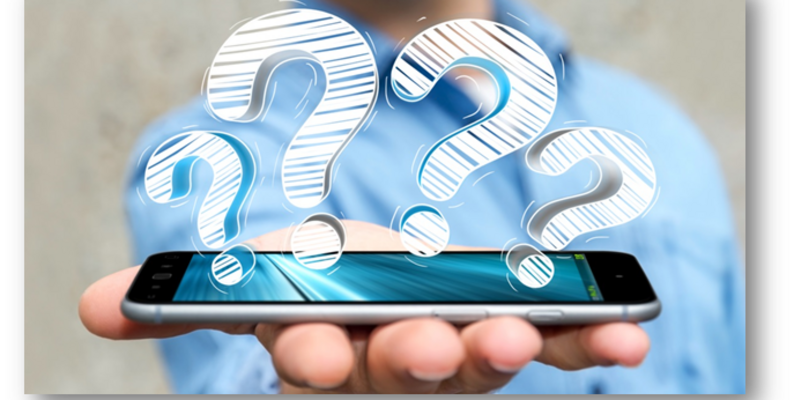

# # Problem Statement

The smartphone market is growing rapidly, with new models being launched frequently by different brands, each offering a wide variety of specifications and features. Due to this diversity, estimating the fair price of a phone has become a challenging task. Consumers often struggle to understand whether the price of a smartphone is justified based on its specifications and brand value, while e-commerce platforms and retailers face difficulties in setting competitive prices. To address this problem, we aim to develop a machine learning model that can accurately predict the price of a smartphone using its specifications such as RAM, storage, processor, display, camera, battery capacity, 5G support, and other relevant factors. Such a model will not only help customers make better purchase decisions but also assist companies and sellers in setting appropriate prices and improving their marketing strategies.

### Algorithm Used:
#####   Linear Regression
#####   XGBoost (XGB Regressor)
#####   Random Forest
#####   Artificial Neural Network
      

# Step 1: Import important modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression 
import os
import warnings
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
warnings.filterwarnings('ignore')
print('Modules Loaded Successfully..!!')

Modules Loaded Successfully..!!


# Step 2: Loading Data

In [2]:
df = pd.read_csv('22222.csv')
print('done')

done


# Step 3: Understanding Data using EDA 

In [3]:
#3.1 data head 
df.head()

,company of the phone,price,ram,display,processor,storage,battery_power,color,Selfi_Camera,brand,model,fast_charging,Screen_resolution,rating,No_of_sim
0,OnePlus Technology,41221,4,6.4,Dimensity 8100,256,5127,Green,12,OnePlus,Nord CE 4,Yes,3200x1440,4.1,1
1,Sony,85348,4,6.8,Apple A17 Pro,1024,5383,Black,8,Sony,Xperia 5 V,No,2480x1080,3.9,2
2,HTC,40048,16,6.8,Unisoc T606,64,4737,Green,12,HTC,Desire 22 Pro,Yes,3040x1440,3.8,1
3,HMD Global (Nokia),27288,4,6.5,Apple A17 Pro,128,4718,Purple,20,Nokia,XR21,Yes,2670x1220,4.1,1
4,OnePlus Technology,51042,4,6.3,Snapdragon 8 Gen 2,512,4144,Purple,32,OnePlus,Nord 3,Yes,1600x720,4.1,2


In [4]:
#3.2 data tail
df.tail()

,company of the phone,price,ram,display,processor,storage,battery_power,color,Selfi_Camera,brand,model,fast_charging,Screen_resolution,rating,No_of_sim
4995,Google LLC,80268,6,6.5,Google Tensor G3,512,4134,Pink,8,Google,Pixel 8 Pro 5G,No,2400x1080,4.9,2
4996,Infinix Mobility,23172,4,6.4,Snapdragon 7s Gen 2,128,4268,Purple,12,Infinix,Note 40 Pro,No,2480x1080,4.2,2
4997,Xiaomi Corporation,36159,24,6.3,Exynos 1380,128,5102,White,50,Xiaomi,13 Pro,Yes,2480x1080,4.1,1
4998,TECNO Mobile,33508,6,6.8,Apple A16 Bionic,256,5479,Black,32,TECNO,Spark 10,Yes,2556x1179,4.3,3
4999,Infinix Mobility,38526,16,6.6,Snapdragon 7s Gen 2,512,4651,Silver,50,Infinix,Hot 40,No,1600x720,4.2,2


In [5]:
#3.3 data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company of the phone  5000 non-null   object 
 1   price                 5000 non-null   int64  
 2   ram                   5000 non-null   int64  
 3   display               5000 non-null   float64
 4   processor             5000 non-null   object 
 5   storage               5000 non-null   int64  
 6   battery_power         5000 non-null   int64  
 7   color                 5000 non-null   object 
 8   Selfi_Camera          5000 non-null   int64  
 9   brand                 5000 non-null   object 
 10  model                 5000 non-null   object 
 11  fast_charging         5000 non-null   object 
 12  Screen_resolution     5000 non-null   object 
 13  rating                5000 non-null   float64
 14  No_of_sim             5000 non-null   int64  
dtypes: float64(2), int64(

In [6]:
#3.4 data columns 
df.columns

Index(['company of the phone', 'price', 'ram', 'display', 'processor',
       'storage', 'battery_power', 'color', 'Selfi_Camera', 'brand', 'model',
       'fast_charging', 'Screen_resolution', 'rating', 'No_of_sim'],
      dtype='object')

In [7]:
#3.5No null value found
# in case of null:remove, fill, replace, drop
df.isnull().sum()

company of the phone    0
price                   0
ram                     0
display                 0
processor               0
storage                 0
battery_power           0
color                   0
Selfi_Camera            0
brand                   0
model                   0
fast_charging           0
Screen_resolution       0
rating                  0
No_of_sim               0
dtype: int64

In [8]:
#3.6 Sample data 
df.sample()

,company of the phone,price,ram,display,processor,storage,battery_power,color,Selfi_Camera,brand,model,fast_charging,Screen_resolution,rating,No_of_sim
1658,Xiaomi Corporation,30975,6,6.4,Snapdragon 7s Gen 2,256,5474,Gray,32,Xiaomi,12 Pro 5G,Yes,3040x1440,3.9,2


In [9]:
#3.7 shape 
df.shape

(5000, 15)

In [10]:
#3.8 column stats 
df.describe()

,price,ram,display,storage,battery_power,Selfi_Camera,rating,No_of_sim
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48705.106200,11.332400,6.489840,391.744000,4923.040200,18.573600,4.201640,1.898200
std,21097.295112,6.656303,0.239851,345.041161,547.926024,11.200575,0.387989,0.439858
min,9414.000000,4.000000,6.100000,64.000000,2908.000000,8.000000,2.800000,1.000000
25%,33610.750000,6.000000,6.300000,128.000000,4625.000000,12.000000,3.900000,2.000000
50%,43363.000000,8.000000,6.500000,256.000000,4965.000000,16.000000,4.200000,2.000000
75%,58352.750000,16.000000,6.700000,512.000000,5279.000000,20.000000,4.500000,2.000000
max,113814.000000,24.000000,6.900000,1024.000000,7026.000000,50.000000,5.000000,3.000000


In [11]:
df.columns

Index(['company of the phone', 'price', 'ram', 'display', 'processor',
       'storage', 'battery_power', 'color', 'Selfi_Camera', 'brand', 'model',
       'fast_charging', 'Screen_resolution', 'rating', 'No_of_sim'],
      dtype='object')

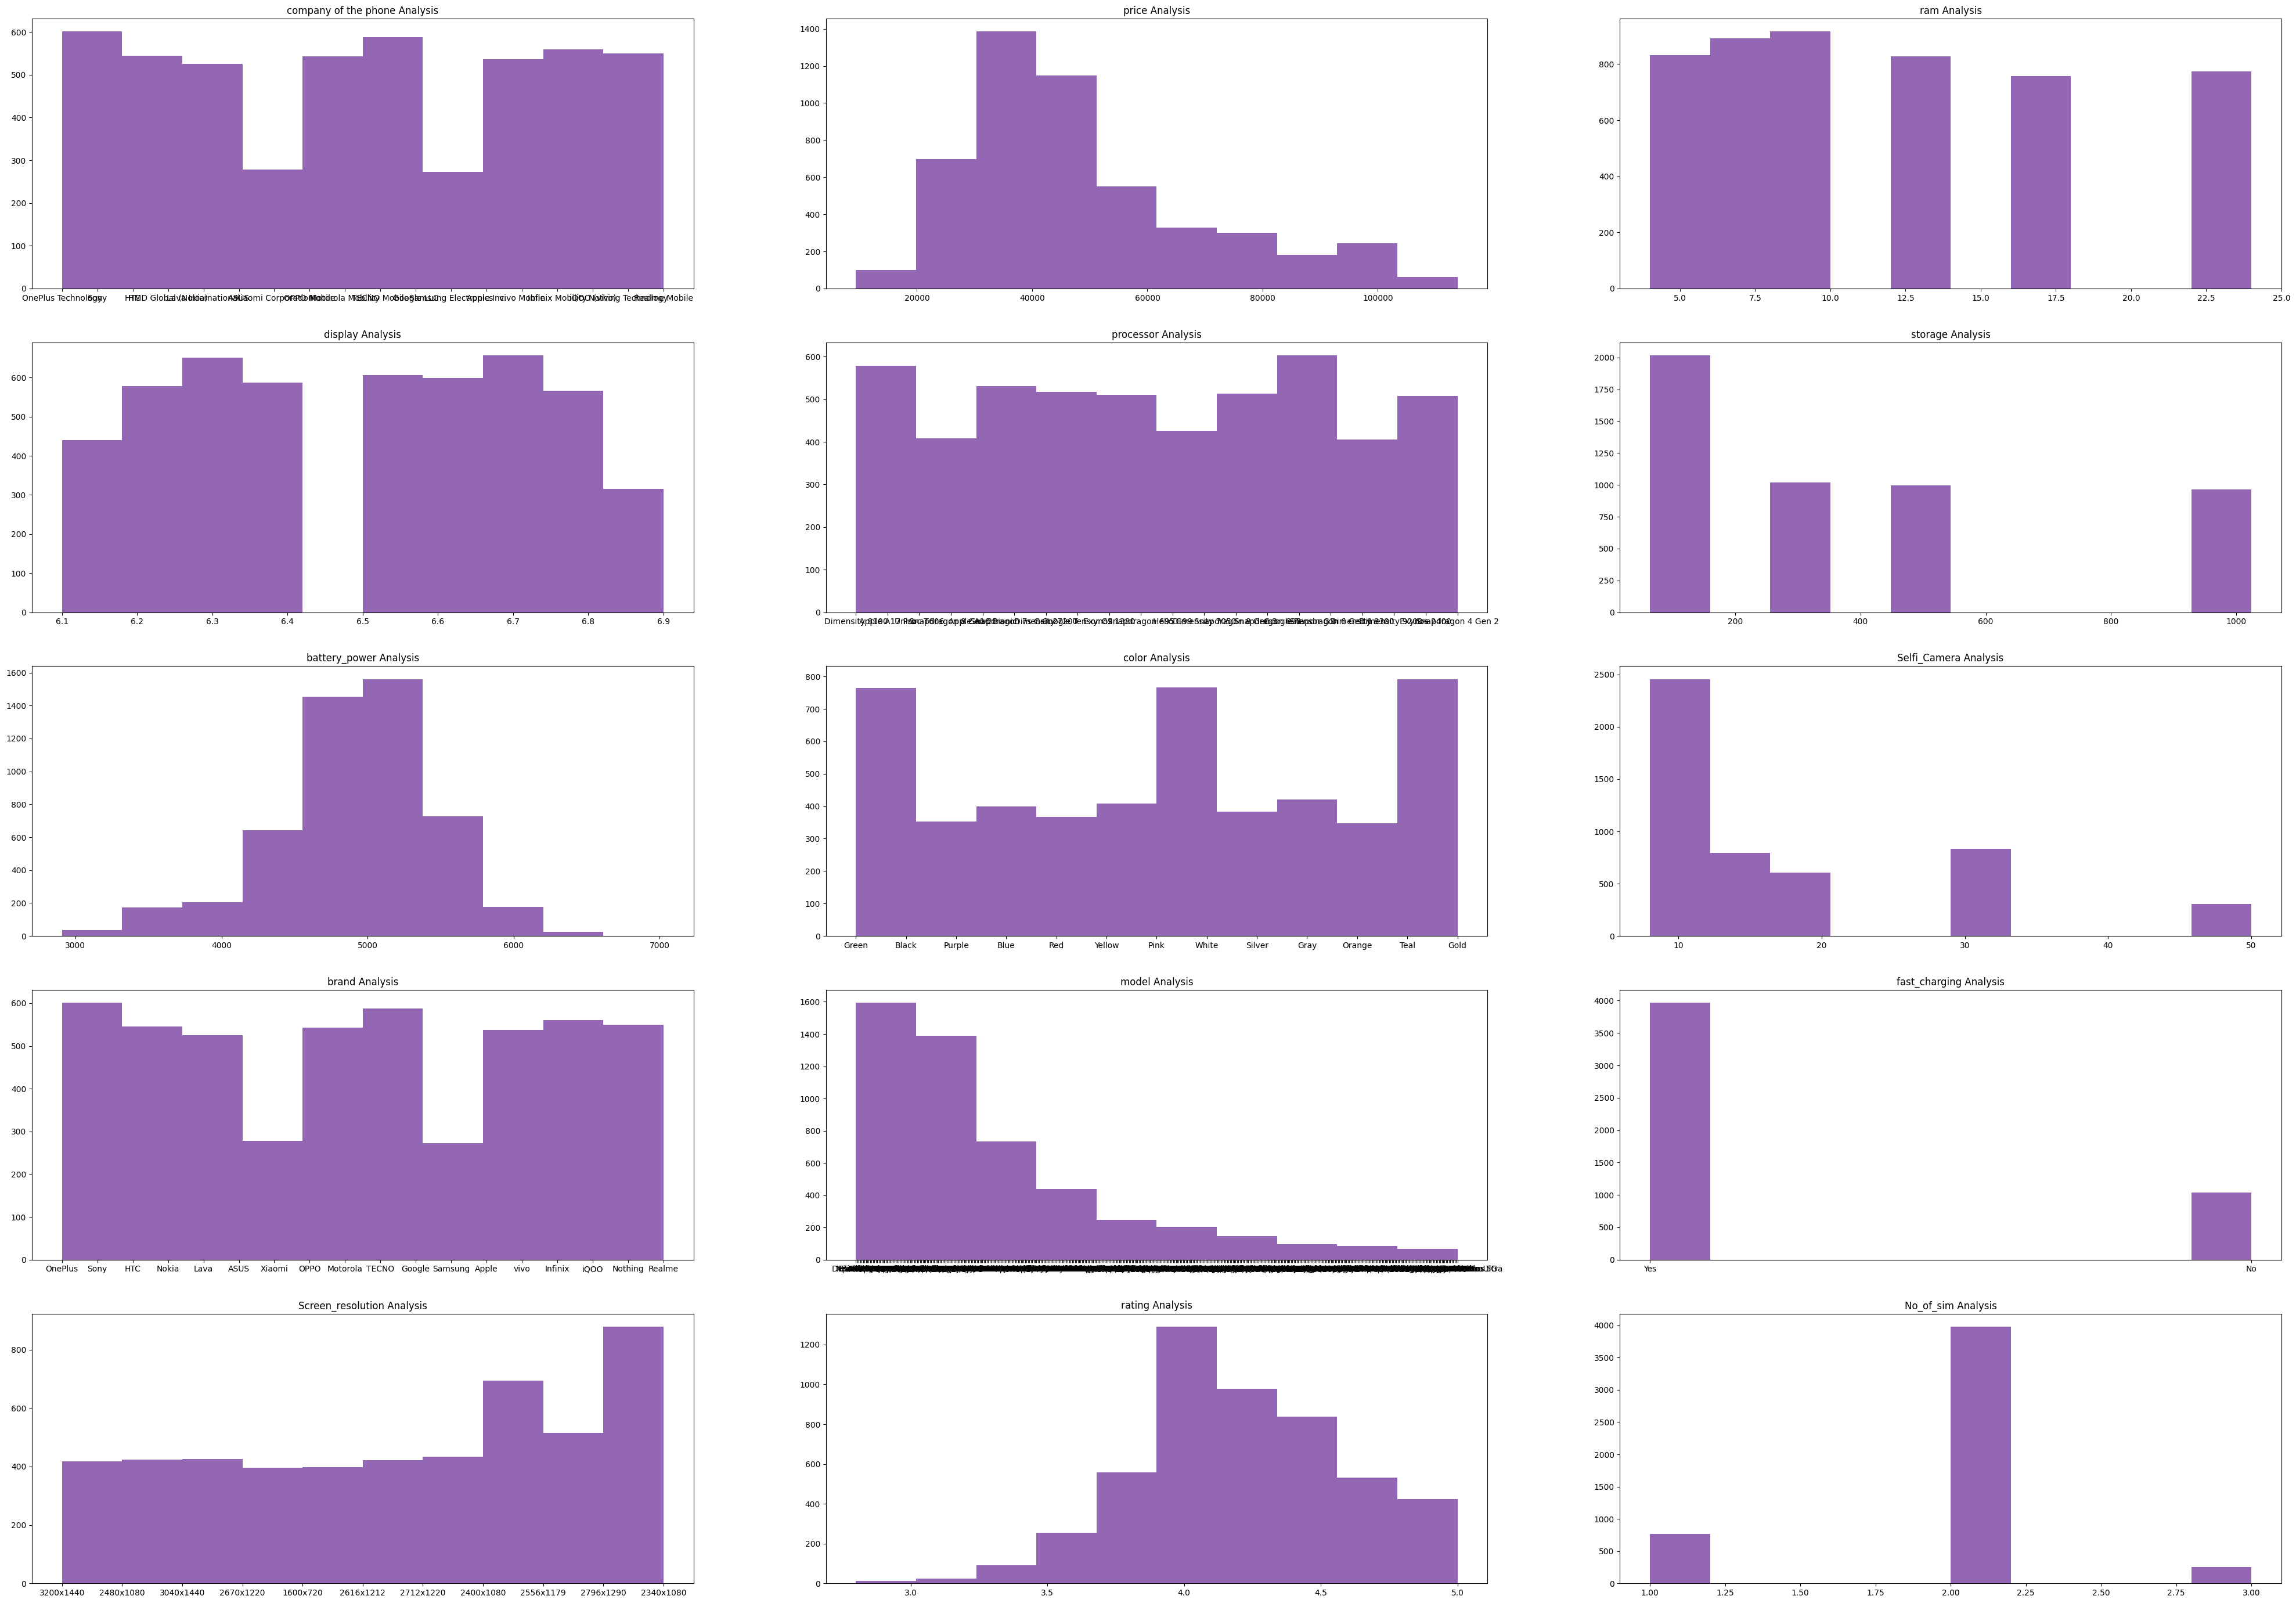

In [12]:
##### 3.10 Each features hist plot distribution 
plt.figure(figsize = (50,35))
for i,j in enumerate(df.columns):
    plt.subplot(5,3, i+1)
    plt.hist(df[j],color = 'indigo', alpha = 0.6)
    plt.title(j + ' Analysis')
plt.show()

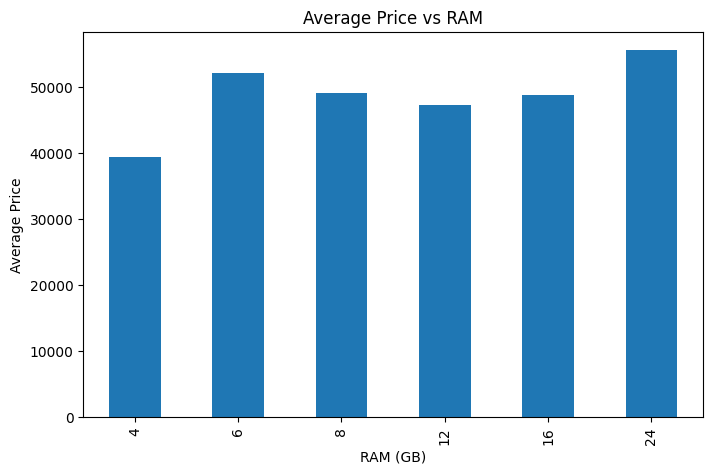

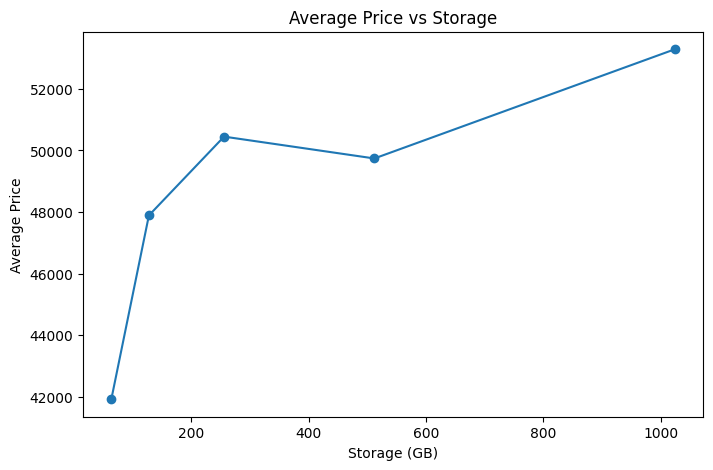

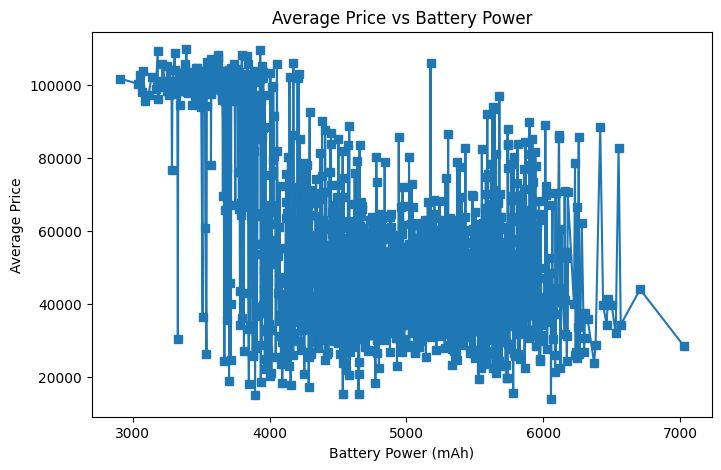

In [13]:
import matplotlib.pyplot as plt

# RAM vs Price
plt.figure(figsize=(8,5))
df.groupby("ram")["price"].mean().plot(kind="bar")
plt.title("Average Price vs RAM")
plt.ylabel("Average Price")
plt.xlabel("RAM (GB)")
plt.show()

# Storage vs Price
plt.figure(figsize=(8,5))
df.groupby("storage")["price"].mean().plot(kind="line", marker="o")
plt.title("Average Price vs Storage")
plt.ylabel("Average Price")
plt.xlabel("Storage (GB)")
plt.show()

# Battery vs Price
plt.figure(figsize=(8,5))
df.groupby("battery_power")["price"].mean().plot(kind="line", marker="s")
plt.title("Average Price vs Battery Power")
plt.ylabel("Average Price")
plt.xlabel("Battery Power (mAh)")
plt.show()

In [14]:
#3.10 categoricql stats 
df.describe(include="object")

,company of the phone,processor,color,brand,model,fast_charging,Screen_resolution
count,5000,5000,5000,5000,5000,5000,5000
unique,18,20,13,18,424,2,11
top,OnePlus Technology,Google Tensor G3,White,OnePlus,Desire 22 Pro,Yes,2400x1080
freq,310,396,421,310,111,3967,693


In [15]:
#3.11 drop the column brand 
df.drop(['brand'], axis=1,inplace=True)

In [16]:
df.columns

Index(['company of the phone', 'price', 'ram', 'display', 'processor',
       'storage', 'battery_power', 'color', 'Selfi_Camera', 'model',
       'fast_charging', 'Screen_resolution', 'rating', 'No_of_sim'],
      dtype='object')

In [17]:
df.head()

,company of the phone,price,ram,display,processor,storage,battery_power,color,Selfi_Camera,model,fast_charging,Screen_resolution,rating,No_of_sim
0,OnePlus Technology,41221,4,6.4,Dimensity 8100,256,5127,Green,12,Nord CE 4,Yes,3200x1440,4.1,1
1,Sony,85348,4,6.8,Apple A17 Pro,1024,5383,Black,8,Xperia 5 V,No,2480x1080,3.9,2
2,HTC,40048,16,6.8,Unisoc T606,64,4737,Green,12,Desire 22 Pro,Yes,3040x1440,3.8,1
3,HMD Global (Nokia),27288,4,6.5,Apple A17 Pro,128,4718,Purple,20,XR21,Yes,2670x1220,4.1,1
4,OnePlus Technology,51042,4,6.3,Snapdragon 8 Gen 2,512,4144,Purple,32,Nord 3,Yes,1600x720,4.1,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company of the phone  5000 non-null   object 
 1   price                 5000 non-null   int64  
 2   ram                   5000 non-null   int64  
 3   display               5000 non-null   float64
 4   processor             5000 non-null   object 
 5   storage               5000 non-null   int64  
 6   battery_power         5000 non-null   int64  
 7   color                 5000 non-null   object 
 8   Selfi_Camera          5000 non-null   int64  
 9   model                 5000 non-null   object 
 10  fast_charging         5000 non-null   object 
 11  Screen_resolution     5000 non-null   object 
 12  rating                5000 non-null   float64
 13  No_of_sim             5000 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [19]:
#3.12 drop the column model
df.drop(['model'],axis=1,inplace=True)

In [20]:
#3.13 rename the column 
df.rename(columns={"company of the phone": "company_phone"}, inplace=True)

In [21]:
df.columns

Index(['company_phone', 'price', 'ram', 'display', 'processor', 'storage',
       'battery_power', 'color', 'Selfi_Camera', 'fast_charging',
       'Screen_resolution', 'rating', 'No_of_sim'],
      dtype='object')

In [22]:
#3.4 make a list of numerical column 
df_num1=['price','ram','display','storage','battery_power','Selfi_Camera','rating','No_of_sim']

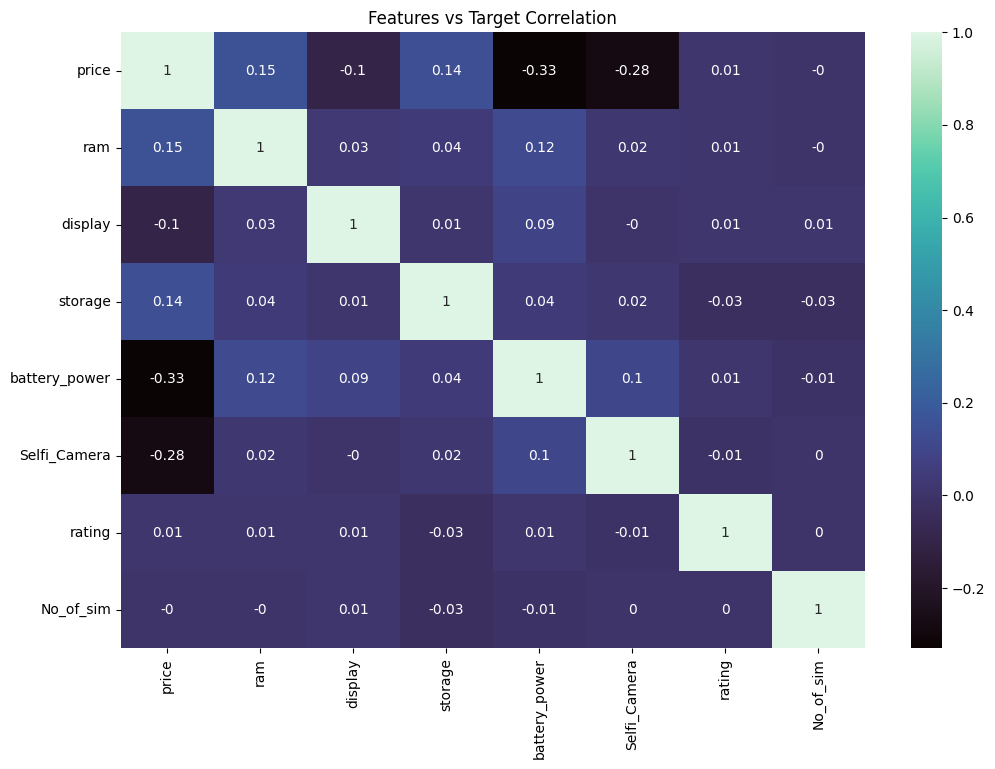

In [23]:
#checking data numerical distribution

plt.figure(figsize=(12,8))
sns.heatmap(df[df_num1].corr().round(2), annot=True, cmap="mako")
plt.title("Features vs Target Correlation")
plt.show()

In [24]:
df.head(10)

,company_phone,price,ram,display,processor,storage,battery_power,color,Selfi_Camera,fast_charging,Screen_resolution,rating,No_of_sim
0,OnePlus Technology,41221,4,6.4,Dimensity 8100,256,5127,Green,12,Yes,3200x1440,4.1,1
1,Sony,85348,4,6.8,Apple A17 Pro,1024,5383,Black,8,No,2480x1080,3.9,2
2,HTC,40048,16,6.8,Unisoc T606,64,4737,Green,12,Yes,3040x1440,3.8,1
3,HMD Global (Nokia),27288,4,6.5,Apple A17 Pro,128,4718,Purple,20,Yes,2670x1220,4.1,1
4,OnePlus Technology,51042,4,6.3,Snapdragon 8 Gen 2,512,4144,Purple,32,Yes,1600x720,4.1,2
5,Lava International,34140,16,6.5,Apple A16 Bionic,64,5055,Blue,20,Yes,3040x1440,3.9,2
6,ASUS,63700,16,6.2,Snapdragon 7s Gen 2,128,5378,Black,8,Yes,2616x1212,4.2,2
7,Xiaomi Corporation,35467,6,6.5,Apple A16 Bionic,64,4576,Red,8,No,2670x1220,4.3,2
8,OPPO Mobile,30038,8,6.3,Dimensity 7200,256,5436,Yellow,16,Yes,3200x1440,4.0,2
9,Xiaomi Corporation,34046,16,6.2,Unisoc T606,128,5068,Pink,8,Yes,2712x1220,5.0,2


# Step 4 Feature Engineering and Preprocessing  

In [25]:
#convert a categorical data into nunerical data 
import pandas as pd


df= pd.get_dummies(df, columns=['processor', 'color', 'fast_charging', 'Screen_resolution'])

print(df.head())

        company_phone  price  ram  display  storage  battery_power  \
0  OnePlus Technology  41221    4      6.4      256           5127   
1                Sony  85348    4      6.8     1024           5383   
2                 HTC  40048   16      6.8       64           4737   
3  HMD Global (Nokia)  27288    4      6.5      128           4718   
4  OnePlus Technology  51042    4      6.3      512           4144   

   Selfi_Camera  rating  No_of_sim  processor_Apple A16 Bionic  ...  \
0            12     4.1          1                       False  ...   
1             8     3.9          2                       False  ...   
2            12     3.8          1                       False  ...   
3            20     4.1          1                       False  ...   
4            32     4.1          2                       False  ...   

   Screen_resolution_2340x1080  Screen_resolution_2400x1080  \
0                        False                        False   
1                        F

In [26]:
#convert a categorical into numerical
import pandas as pd


df = pd.get_dummies(df, columns=['company_phone'])

print(df.head())

   price  ram  display  storage  battery_power  Selfi_Camera  rating  \
0  41221    4      6.4      256           5127            12     4.1   
1  85348    4      6.8     1024           5383             8     3.9   
2  40048   16      6.8       64           4737            12     3.8   
3  27288    4      6.5      128           4718            20     4.1   
4  51042    4      6.3      512           4144            32     4.1   

   No_of_sim  processor_Apple A16 Bionic  processor_Apple A17 Pro  ...  \
0          1                       False                    False  ...   
1          2                       False                     True  ...   
2          1                       False                    False  ...   
3          1                       False                     True  ...   
4          2                       False                    False  ...   

   company_phone_Nothing Technology  company_phone_OPPO Mobile  \
0                             False                     

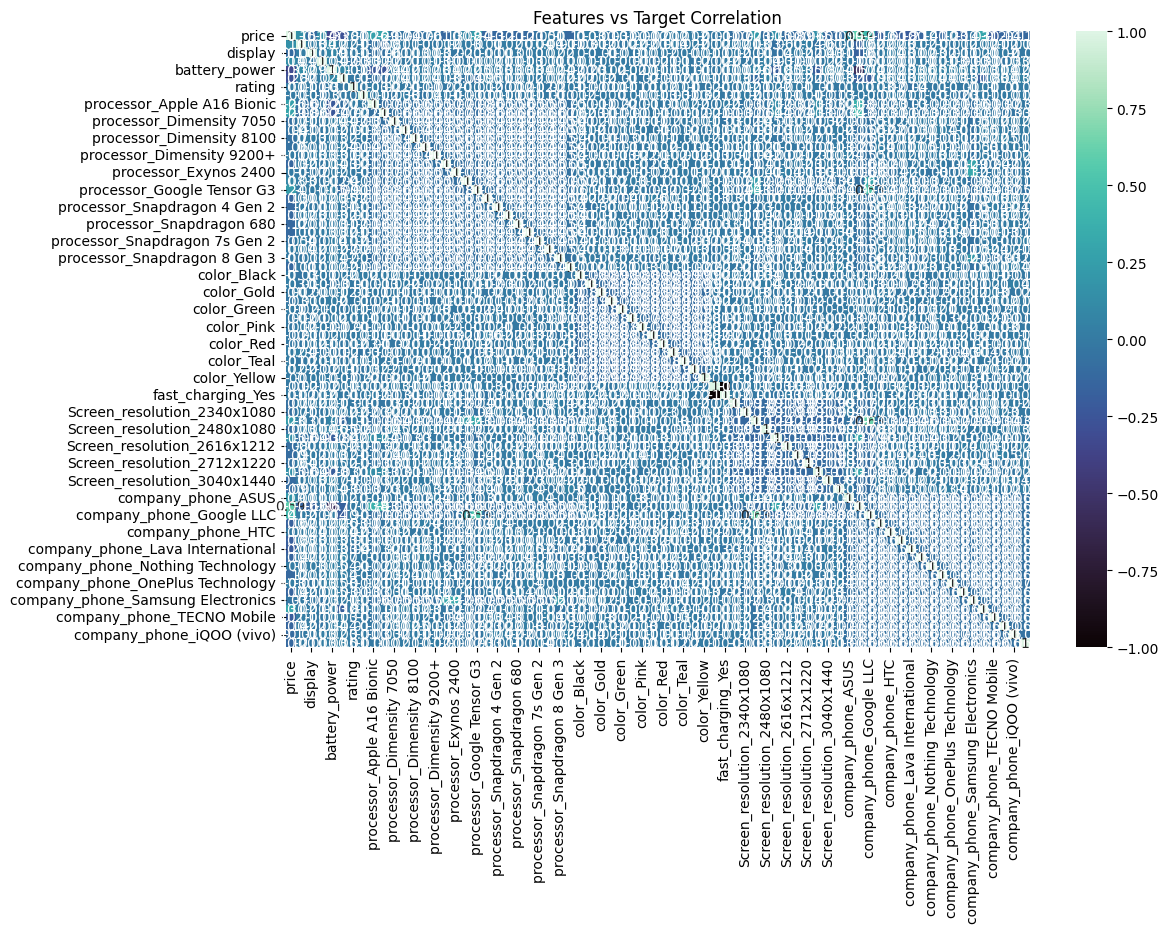

In [27]:
#checking data distribution

plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), annot=True, cmap="mako")
plt.title("Features vs Target Correlation")
plt.show()

In [28]:
df.dtypes

price                                 int64
ram                                   int64
display                             float64
storage                               int64
battery_power                         int64
                                     ...   
company_phone_Sony                     bool
company_phone_TECNO Mobile             bool
company_phone_Xiaomi Corporation       bool
company_phone_iQOO (vivo)              bool
company_phone_vivo Mobile              bool
Length: 72, dtype: object

RandomForest R^2 Score: 0.5926238252664533
         feature  importance
0  battery_power    0.347699
1      processor    0.195430
2  screen_pixels    0.105344
3   Selfi_Camera    0.093554
4            ram    0.071147
5          color    0.055359
6        storage    0.053122
7         rating    0.035687
8        display    0.029024
9      No_of_sim    0.007864


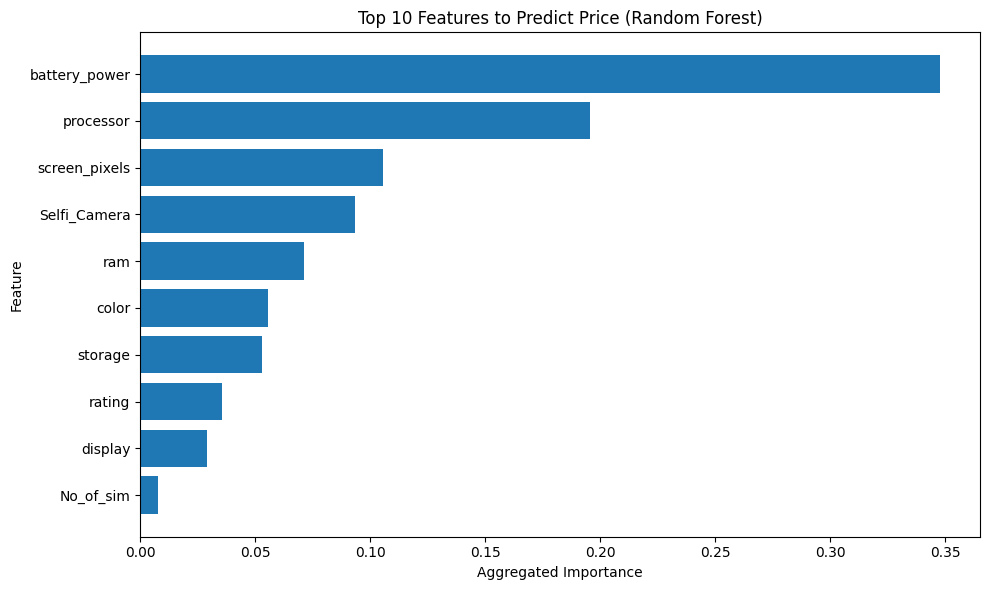

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1) Load data
df = pd.read_csv("22222.csv").copy()

# 2) Drop columns you don't want to use as features
drop_cols = ["brand", "company of the phone", "model"]
df = df.drop(columns=drop_cols, errors="ignore")

# 3) Feature engineering: convert screen resolution into total pixels
def parse_resolution(val):
    try:
        if isinstance(val, str) and "x" in val.lower():
            w, h = val.lower().split("x")
            return int(float(w)) * int(float(h))
        return np.nan
    except Exception:
        return np.nan

if "Screen_resolution" in df.columns:
    df["screen_pixels"] = df["Screen_resolution"].apply(parse_resolution)
    df["screen_pixels"] = df["screen_pixels"].fillna(df["screen_pixels"].median())

# Convert fast_charging Yes/No → 1/0
if "fast_charging" in df.columns:
    df["fast_charging"] = (
        df["fast_charging"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})
    )
    df["fast_charging"] = df["fast_charging"].fillna(0)

# 4) Separate features and target
target_col = "price"
y = df[target_col]
feature_cols = [c for c in df.columns if c != target_col]

# Split numeric vs categorical
numeric_cols = []
categorical_cols = []
for c in feature_cols:
    if pd.api.types.is_numeric_dtype(df[c]):
        numeric_cols.append(c)
    else:
        categorical_cols.append(c)

# Drop raw Screen_resolution string if present (we use screen_pixels instead)
if "Screen_resolution" in categorical_cols:
    categorical_cols.remove("Screen_resolution")
    if "screen_pixels" not in numeric_cols and "screen_pixels" in df.columns:
        numeric_cols.append("screen_pixels")

# One-hot encode categoricals
X_num = df[numeric_cols].copy() if numeric_cols else pd.DataFrame(index=df.index)
X_cat = (
    pd.get_dummies(df[categorical_cols], prefix=categorical_cols, prefix_sep="=", drop_first=False)
    if categorical_cols else pd.DataFrame(index=df.index)
)
X = pd.concat([X_num, X_cat], axis=1)

# 5) Train RandomForest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RandomForest R^2 Score:", r2_score(y_test, y_pred))

# 6) Aggregate importances back to original feature names
importances = rf.feature_importances_
feat_names = X.columns

def original_name(col):
    return col.split("=", 1)[0] if "=" in col else col

agg = {}
for name, imp in zip(feat_names, importances):
    key = original_name(name)
    agg[key] = agg.get(key, 0.0) + float(imp)

importance_df = (
    pd.DataFrame({"feature": list(agg.keys()), "importance": list(agg.values())})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# 7) Top 10 features
top10 = importance_df.head(10)
print(top10)

# 8) Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10["feature"][::-1], top10["importance"][::-1])
plt.title("Top 10 Features to Predict Price (Random Forest)")
plt.xlabel("Aggregated Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [28]:
df.describe()

,price,ram,display,storage,battery_power,Selfi_Camera,rating,No_of_sim
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48705.106200,11.332400,6.489840,391.744000,4923.040200,18.573600,4.201640,1.898200
std,21097.295112,6.656303,0.239851,345.041161,547.926024,11.200575,0.387989,0.439858
min,9414.000000,4.000000,6.100000,64.000000,2908.000000,8.000000,2.800000,1.000000
25%,33610.750000,6.000000,6.300000,128.000000,4625.000000,12.000000,3.900000,2.000000
50%,43363.000000,8.000000,6.500000,256.000000,4965.000000,16.000000,4.200000,2.000000
75%,58352.750000,16.000000,6.700000,512.000000,5279.000000,20.000000,4.500000,2.000000
max,113814.000000,24.000000,6.900000,1024.000000,7026.000000,50.000000,5.000000,3.000000


In [29]:
# Convert data to Same Scale for Better prediction
from sklearn.preprocessing import MinMaxScaler


X = df.drop("price", axis=1)
y = df["price"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [30]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


# Step 5 Train Test Split: Split Data for Training and Testing Part

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 71)
(1000, 71)
(4000,)
(1000,)


# Step 6: Model Building

### step 6.1: Linear Model using Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6.1.2: Model Prediction

In [34]:
y_pred = model.predict(X_test)
print('Done')

Done


In [35]:
lr_compare_df = pd.DataFrame({'Actual Phone price': y_test,
             'Predicted Phone Price': y_pred})

print('Done')

Done


In [36]:
lr_compare_df

,Actual Phone price,Predicted Phone Price
1501,50520,55303.092773
2586,34616,33532.566406
2653,77337,76115.432617
1055,31264,36567.104004
705,52188,49251.743652
...,...,...
4711,46792,43844.942383
2313,40845,45017.417969
3214,99240,100428.679688
2732,21747,26582.944336


In [37]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('LR_MAE',lr_mae)

LR_MAE 1980.0536928710937


In [38]:
lr_mse = mean_squared_error(y_test,y_pred)
print('LR_MSE',lr_mse)

LR_MSE 6232913.8222886585


In [39]:
lr_rmse = lr_mse**.5
print('LR_RMSE',lr_rmse)


LR_RMSE 2496.5804257601353


In [40]:
# Training Score
lr_train_score = model.score(X_train,y_train)
print('Training Score', lr_train_score)

# Testing Score
lr_test_score = model.score(X_test,y_test)
print('Testing Score', lr_test_score)

Training Score 0.9866485696214605
Testing Score 0.9855160737957324


In [41]:
from sklearn.ensemble import RandomForestRegressor 
model_rf = RandomForestRegressor(n_estimators = 200)
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [42]:
y_pred = model_rf.predict(X_test)

In [43]:
model_rf.score(X_test,y_test)

0.9586341066065899

In [44]:
import xgboost
print('Done')

Done


In [45]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor() 
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred = model_xgb.predict(X_test)

In [47]:
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

In [48]:
r2

0.9805527329444885

In [49]:
model_xgb.score(X_test,y_test)

0.9805527329444885

In [50]:
import tensorflow as tf


In [51]:
from keras.models import Sequential 


In [52]:
from keras.layers import Dense

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

# X_train_s = scaler.fit_transform(X_train)  # after OHE + split + scale
n_features = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(n_features,)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # regression
])

In [54]:
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)   # regression output
])

In [55]:
model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [56]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=1
)

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 785664.2500 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 785664.3125 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 785664.2500 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 785664.2500 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 785664.3125 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 785664.1875 - val_accuracy: 0.0000e+00 - val_loss: 782550.5625
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 785664.3750 - val_accuracy: 0.0000

# Step 7: Save Model & Extra Objects

In [57]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

In [59]:
import pickle

with open('Phone_price_prediction.pkl','wb') as f:
    pickle.dump(final_model,f)
    
with open('sc_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
    
print('ML Model and Scaller Saved Successfully!!')

ML Model and Scaller Saved Successfully!!


# Step 8: Website Building and Localhost Deployment

In [64]:
import streamlit as st
print('done')

done


In [65]:
os.getcwd()

'C:\\Users\\prerna dhamija\\Downloads\\gaurav python'